___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Import Libraries & Data

In [1]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this.")

You can safely ignore this.


In [2]:
import os

# Set tensorflow log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import tensorflow as tf

# Uncomment the following lines if you want to suppress warnings:
# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [4]:
path = "Churn_Modelling.csv"
df = pd.read_csv(path)

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [5]:
df.shape

(10000, 14)

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.isnull().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rownumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
customerid,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
creditscore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
numofproducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
hascrcard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
isactivemember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
estimatedsalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


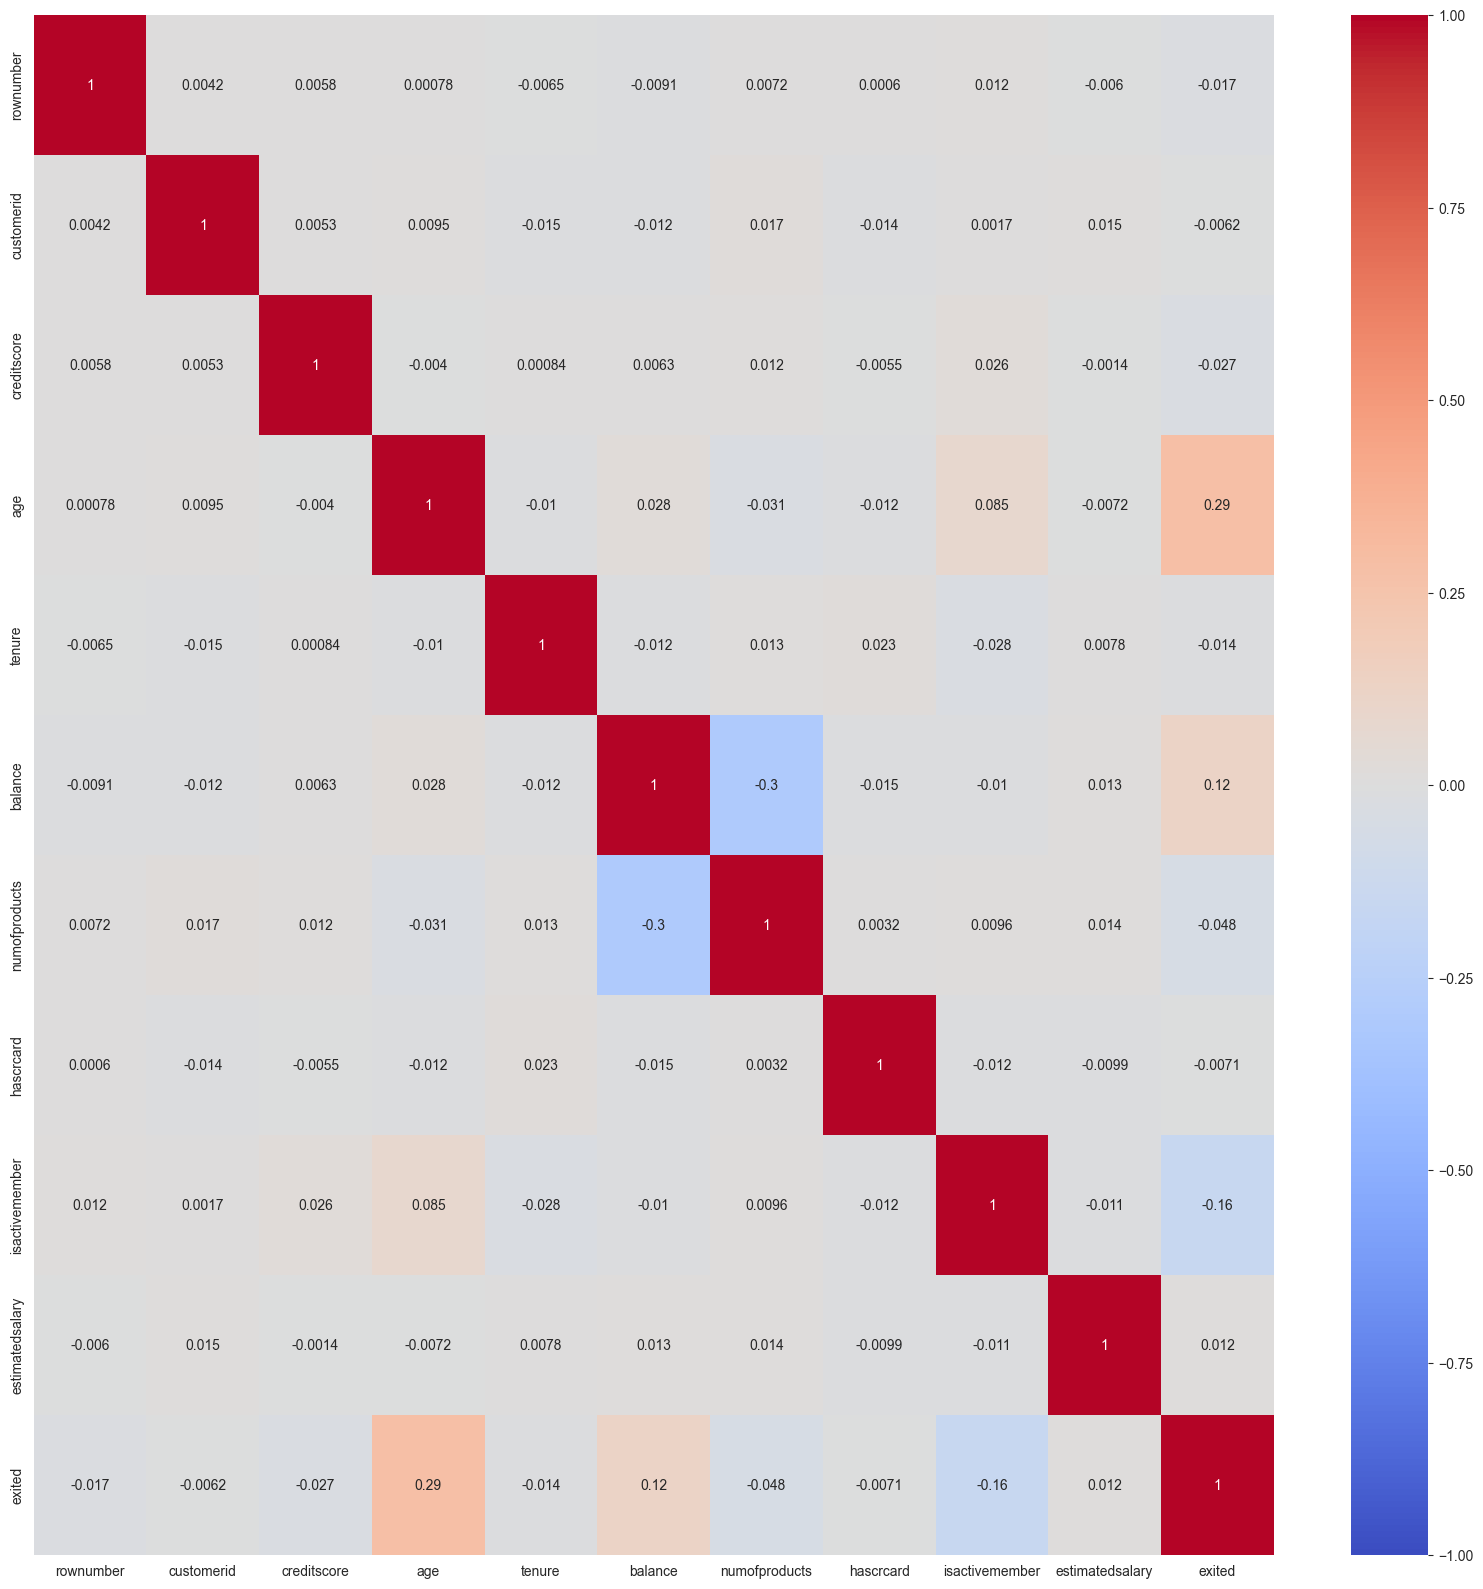

In [11]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

In [12]:
df = df.drop('rownumber', axis=1)
df

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


In [13]:
df = df.drop('customerid', axis=1)
df

,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


In [14]:
df = df.drop('surname', axis=1)
df

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


In [15]:
df = df.rename(columns={'geography': 'country'})
df

,creditscore,country,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


In [16]:
df.country.value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

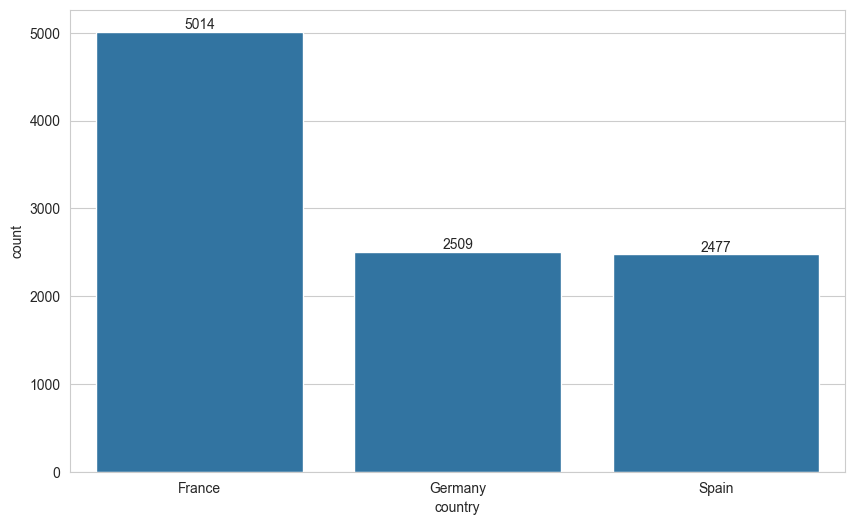

In [17]:
ax = sns.countplot(x=df["country"], order=df.country.value_counts().index)
ax.bar_label(ax.containers[0]);

In [18]:
df.gender.value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

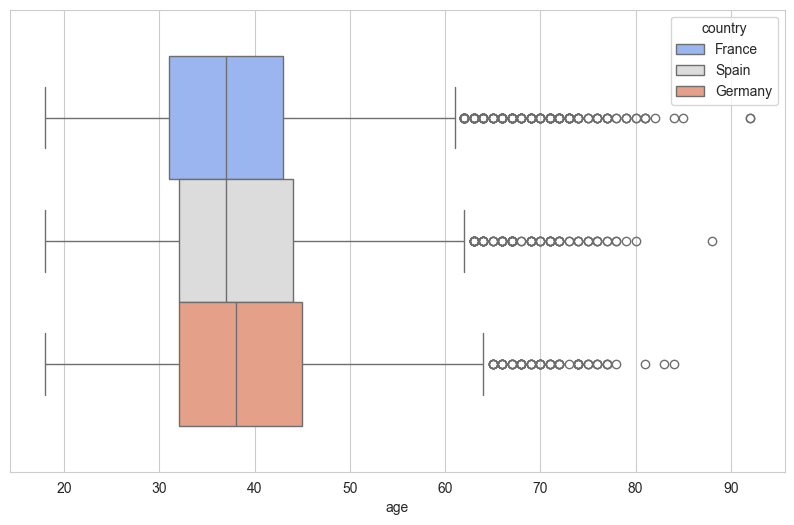

In [19]:
sns.boxplot(x="age", hue="country", data=df, palette="coolwarm")
plt.show()

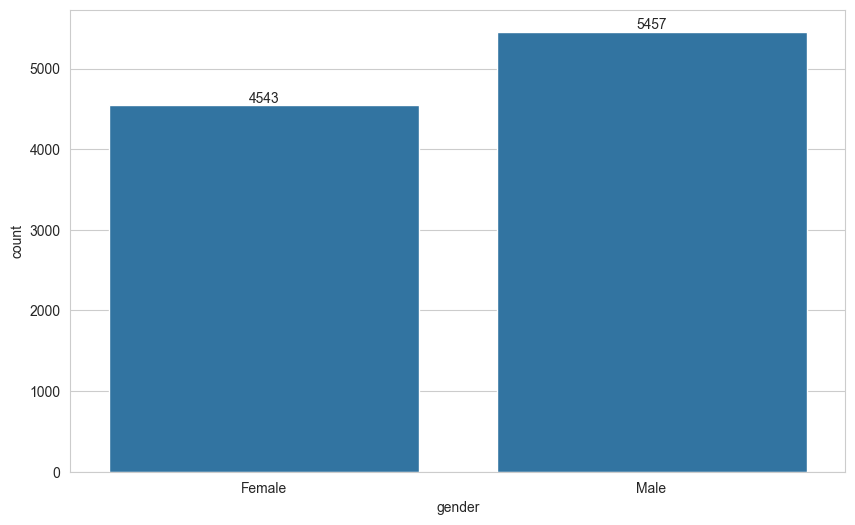

In [20]:
ax = sns.countplot(x=df["gender"])
ax.bar_label(ax.containers[0]);

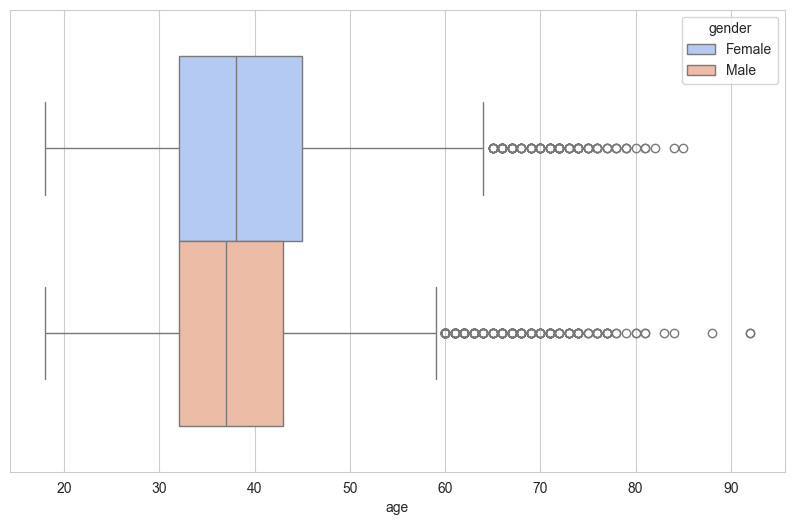

In [21]:
sns.boxplot(x="age", hue="gender", data=df, palette="coolwarm")
plt.show()

In [22]:
# df['gender'] = df['gender'].map({'Female':0,'Male':1})
# df.info()

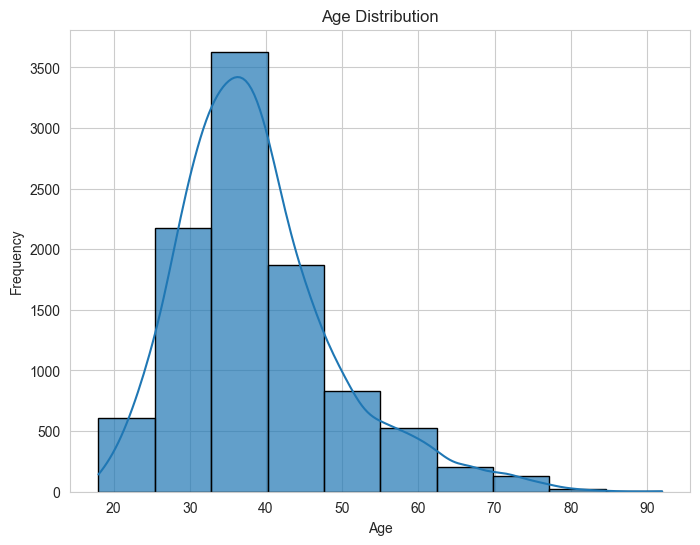

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=10, kde=True, edgecolor='black', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [24]:
df.exited.value_counts()

exited
0    7963
1    2037
Name: count, dtype: int64

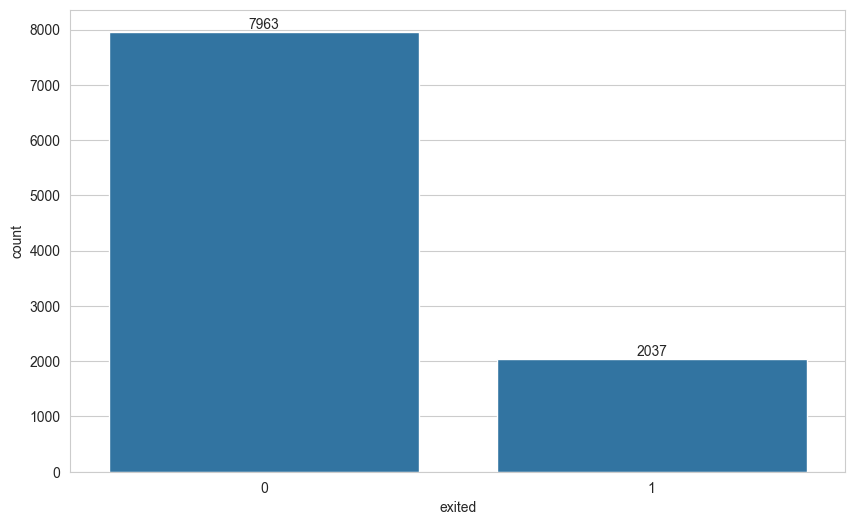

In [25]:
ax = sns.countplot(x=df["exited"])
ax.bar_label(ax.containers[0]);

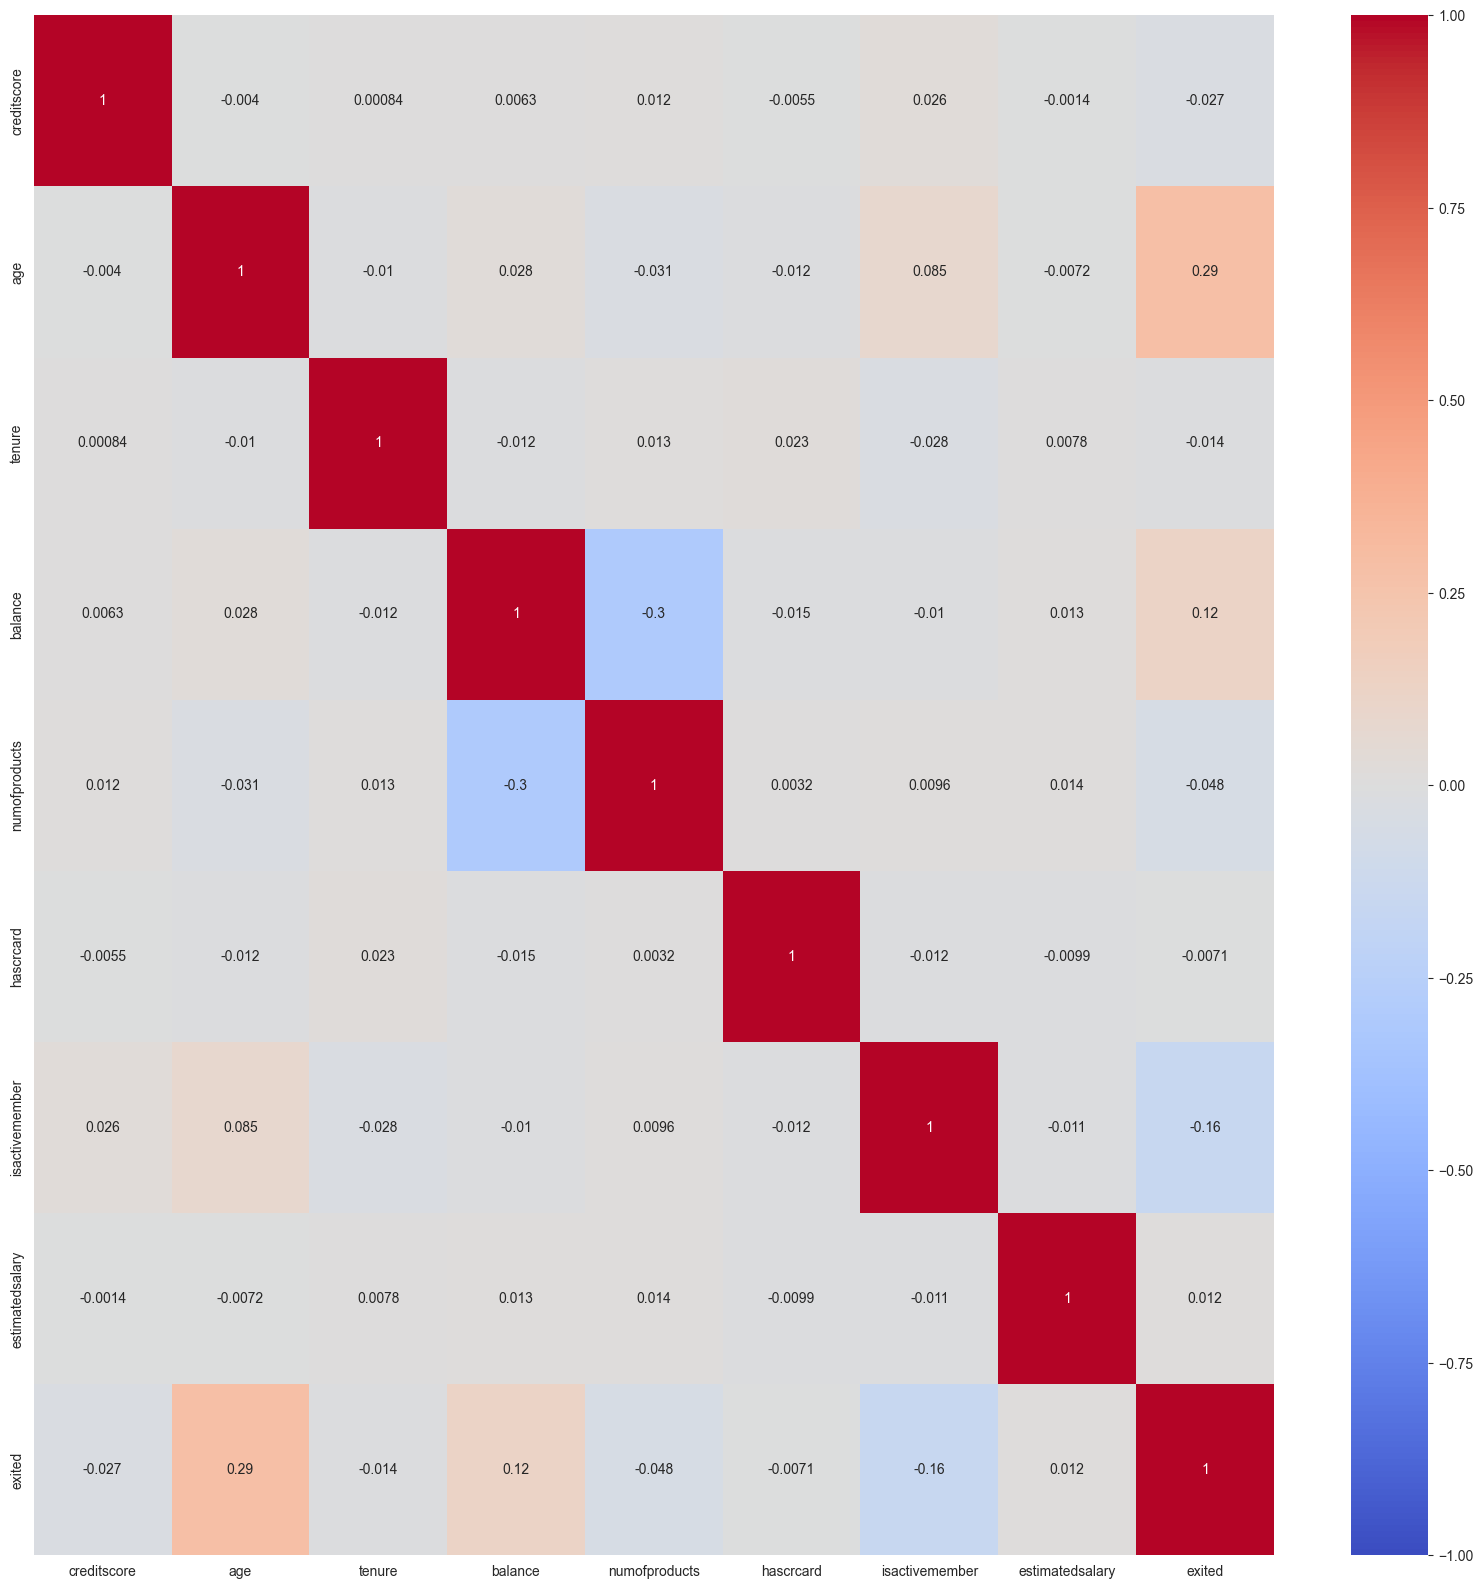

In [26]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

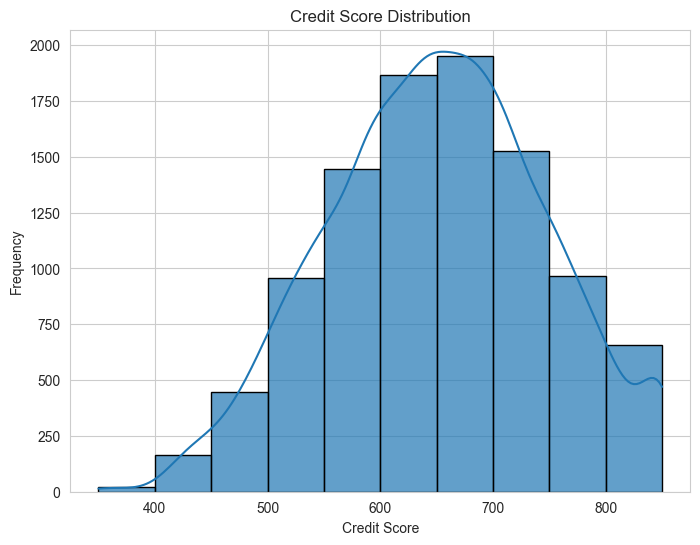

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(df['creditscore'], bins=10, kde=True, edgecolor='black', alpha=0.7)
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

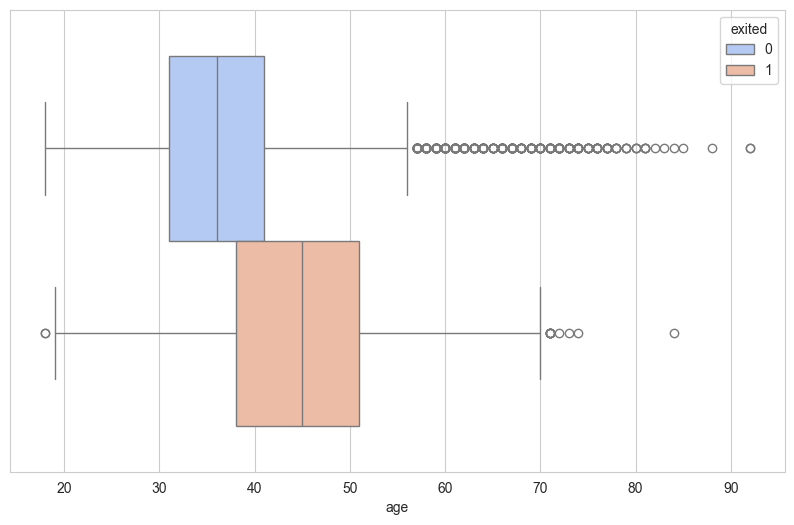

In [28]:
sns.boxplot(x="age", hue="exited", data=df, palette="coolwarm")
plt.show()

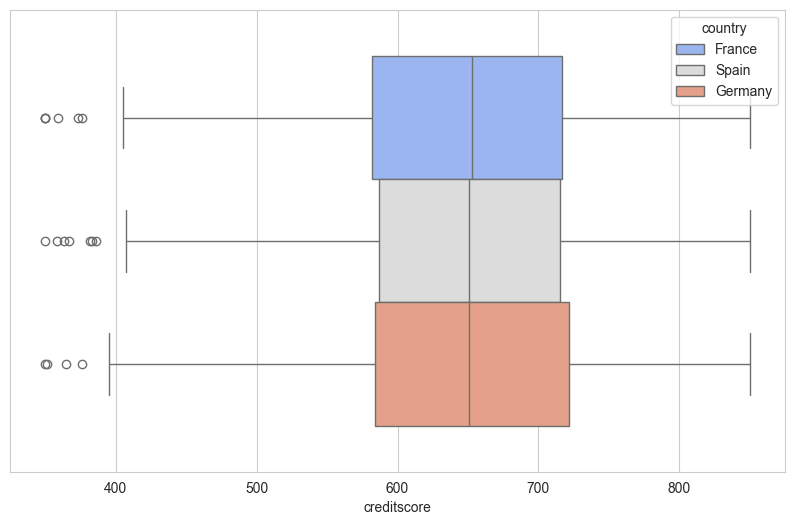

In [29]:
sns.boxplot(x="creditscore", hue="country", data=df, palette="coolwarm")
plt.show()

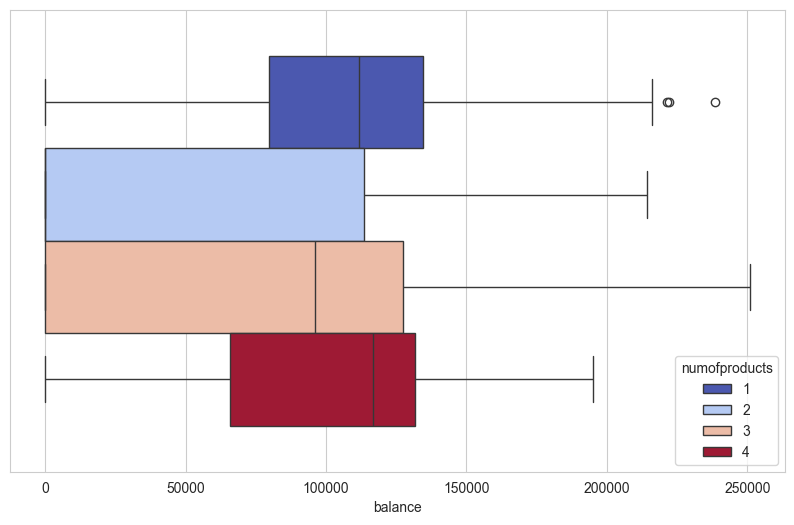

In [30]:
sns.boxplot(x="balance", hue="numofproducts", data=df, palette="coolwarm")
plt.show()

In [31]:
df.head()

,creditscore,country,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [32]:
df.shape

(10000, 11)

# Preprocessing of Data
- Train | Test Split, Scalling

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [34]:
X = df.drop('exited', axis=1)
y = df['exited']

In [35]:
seed = 42
keras.utils.set_random_seed(seed)

In [36]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.10, random_state=seed
)

In [37]:
# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, stratify=y_train, test_size=0.10, random_state=seed
)

In [38]:
X_train

,creditscore,country,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
8609,678,France,Male,40,1,0.000,2,1,1,187343.400
8365,850,France,Male,31,1,96399.310,2,1,0,106534.150
1917,428,Germany,Female,40,3,129248.110,2,1,0,72876.430
7292,744,Spain,Male,34,3,0.000,2,1,0,27244.350
6886,733,Germany,Male,45,2,113939.360,2,1,0,3218.710
...,...,...,...,...,...,...,...,...,...,...
9868,718,France,Female,43,0,93143.390,1,1,0,167554.860
5547,688,France,Male,38,7,148045.680,1,1,0,175479.920
5913,679,Spain,Male,42,2,0.000,1,1,1,168294.270
2931,638,Germany,Female,37,7,124513.660,2,1,0,158610.890


In [39]:
X_val

,creditscore,country,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
1827,425,Spain,Female,22,7,169649.730,2,0,1,136365.000
7751,750,Spain,Female,39,6,0.000,2,0,0,19264.330
4522,629,Spain,Male,39,5,0.000,2,0,0,116748.140
9840,576,Spain,Male,26,8,0.000,2,0,1,34101.060
1801,452,France,Male,30,7,112935.870,1,1,1,99017.340
...,...,...,...,...,...,...,...,...,...,...
837,686,Germany,Female,56,5,111642.080,1,1,1,80553.870
2680,625,France,Female,39,5,0.000,2,1,0,32615.210
3196,610,France,Male,36,4,129440.300,2,1,0,102638.350
8258,590,France,Male,41,1,89086.310,1,1,0,24499.970


In [40]:
X_test

,creditscore,country,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
8073,777,Germany,Female,34,5,96693.660,1,1,1,172618.520
2083,534,France,Male,24,1,0.000,1,1,1,169653.320
8586,650,Germany,Female,46,9,149003.760,2,1,0,176902.830
7951,850,France,Female,40,0,0.000,2,1,0,1099.950
6426,743,Spain,Male,45,7,157332.260,1,1,0,125424.420
...,...,...,...,...,...,...,...,...,...,...
6970,696,Germany,Female,66,7,119499.420,2,1,1,174027.300
8173,757,Germany,Male,31,1,127320.360,3,1,0,163170.320
1235,523,Germany,Male,63,6,116227.270,1,1,1,119404.630
3748,596,France,Female,39,10,86546.290,1,0,1,131768.980


In [41]:
y_train

8609    0
8365    0
1917    1
7292    0
6886    0
       ..
9868    0
5547    1
5913    0
2931    0
1476    0
Name: exited, Length: 8100, dtype: int64

In [42]:
y_val

1827    1
7751    0
4522    0
9840    0
1801    0
       ..
837     0
2680    0
3196    0
8258    0
7544    0
Name: exited, Length: 900, dtype: int64

In [43]:
y_test

8073    0
2083    0
8586    0
7951    0
6426    0
       ..
6970    0
8173    0
1235    0
3748    0
4081    0
Name: exited, Length: 1000, dtype: int64

In [44]:
from sklearn.preprocessing import OneHotEncoder

In [45]:
# Encode Data

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[['country', 'gender']])
X_val_encoded = encoder.fit_transform(X_val[['country', 'gender']])
X_test_encoded = encoder.fit_transform(X_test[['country', 'gender']])

# Convert to DataFrame for better readability
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(['country', 'gender']))
X_val_encoded_df = pd.DataFrame(X_val_encoded, columns=encoder.get_feature_names_out(['country', 'gender']))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(['country', 'gender']))

# Drop the original categorical columns 
X_train = X_train.drop(['country', 'gender'], axis=1).reset_index(drop=True)
X_val = X_val.drop(['country', 'gender'], axis=1).reset_index(drop=True)
X_test = X_test.drop(['country', 'gender'], axis=1).reset_index(drop=True)

# Concatenate the encoded ones
X_train_final = pd.concat([X_train, X_train_encoded_df], axis=1)
X_val_final = pd.concat([X_val, X_val_encoded_df], axis=1)
X_test_final = pd.concat([X_test, X_test_encoded_df], axis=1)

# Display the final datasets
print("X_train_final:")
print(X_train_final)
print("\nX_val_final:")
print(X_val_final)
print("\nX_test_final:")
print(X_test_final)
print("\ny_train:")
print(y_train.reset_index(drop=True))
print("\ny_val:")
print(y_val.reset_index(drop=True))
print("\ny_test:")
print(y_test.reset_index(drop=True))

X_train_final:
      creditscore  age  tenure    balance  numofproducts  hascrcard  \
0             678   40       1      0.000              2          1   
1             850   31       1  96399.310              2          1   
2             428   40       3 129248.110              2          1   
3             744   34       3      0.000              2          1   
4             733   45       2 113939.360              2          1   
...           ...  ...     ...        ...            ...        ...   
8095          718   43       0  93143.390              1          1   
8096          688   38       7 148045.680              1          1   
8097          679   42       2      0.000              1          1   
8098          638   37       7 124513.660              2          1   
8099          756   26       5 101641.140              2          0   

      isactivemember  estimatedsalary  country_France  country_Germany  \
0                  1       187343.400           1.000     

In [46]:
X_train = X_train_final
X_val = X_val_final
X_test = X_test_final

In [47]:
X_train.shape

(8100, 13)

In [48]:
X_val.shape

(900, 13)

In [49]:
X_test.shape

(1000, 13)

In [50]:
# Scale Data 
scaler = MinMaxScaler()

In [51]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## without class_weigth

### Create The Model

In [53]:
# trial_metric = "accuracy"
# batch_size = 64
# import optuna

In [54]:
model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data =(X_val, y_val),
    batch_size=32,
    epochs=500,
    verbose=1
)

Epoch 1/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.6960 - loss: 0.5954 - val_accuracy: 0.7967 - val_loss: 0.4776
Epoch 2/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.8027 - loss: 0.4509 - val_accuracy: 0.7989 - val_loss: 0.4615
Epoch 3/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.8173 - loss: 0.4258 - val_accuracy: 0.8011 - val_loss: 0.4536
Epoch 4/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.8248 - loss: 0.4134 - val_accuracy: 0.7989 - val_loss: 0.4485
Epoch 5/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.8258 - loss: 0.4054 - val_accuracy: 0.8011 - val_loss: 0.4422
Epoch 6/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.8299 - loss: 0.3979 - val_accuracy: 0.8044 - val_loss: 0.4369
Epoch 7/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.8336 - loss: 0.3898 - val_accuracy: 0.8067 - val_loss: 0.4281
Epoch 8/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.8362 - loss: 0

In [56]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 36)             │           504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 18)             │           666 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │           171 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,055 (15.84 KB)

 Trainable params: 1,351 (5.28 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,704 (10.57 KB)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [57]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.771,0.528,0.797,0.478
1,0.805,0.453,0.799,0.462
2,0.816,0.436,0.801,0.454
3,0.820,0.427,0.799,0.449
4,0.821,0.419,0.801,0.442


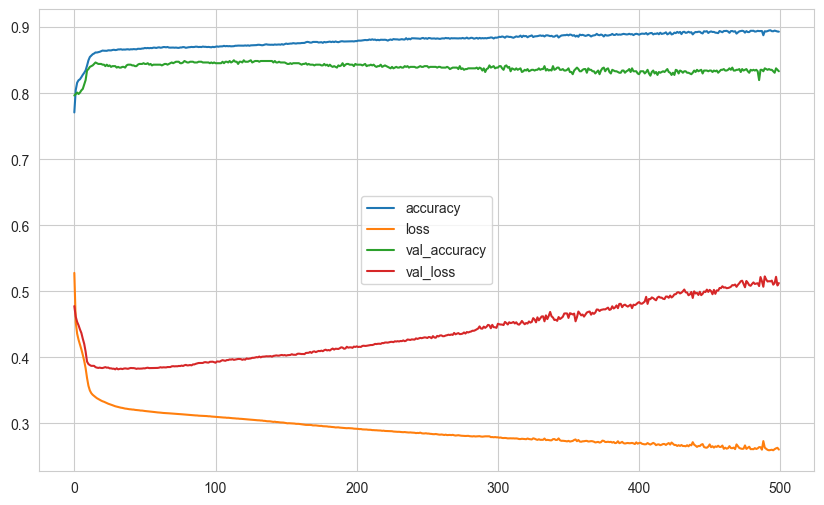

In [58]:
loss_df.plot()
plt.show()

In [59]:
model.evaluate(X_test, y_test, verbose=0)

[0.42146119475364685, 0.8450000286102295]

In [72]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.4989323616027832
accuracy:  0.8479999899864197


In [73]:
y_pred_test = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

y_pred_train = model.predict(X_test) > 0.5
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
[[761  35]
 [117  87]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.71      0.43      0.53       204

    accuracy                           0.85      1000
   macro avg       0.79      0.69      0.72      1000
weighted avg       0.84      0.85      0.83      1000

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step


ValueError: Found input variables with inconsistent numbers of samples: [8100, 1000]

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [62]:
def build_model():
    model = Sequential()
    model.add(Input(shape = (X_train.shape[1],))),
    model.add(Dense(64, activation='relu')),
    model.add(Dense(64, activation='relu')),
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)

In [ ]:
 # Build and compile the model
model = build_model()
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
 # Evaluate the model
val_preds = (model.predict(X_val) > 0.5).astype(int)
val_accuracy = accuracy_score(y_val, val_preds)

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

### Add Dropout Layer

In [70]:
from tensorflow.keras.layers import Dropout

In [71]:
model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data = (X_val, y_val),
    batch_size=32,
    epochs=500,
    verbose=1
)

Epoch 1/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 753us/step - accuracy: 0.7713 - loss: 0.5809 - val_accuracy: 0.7967 - val_loss: 0.4960
Epoch 2/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.7974 - loss: 0.5199 - val_accuracy: 0.7967 - val_loss: 0.4814
Epoch 3/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.7980 - loss: 0.5118 - val_accuracy: 0.7967 - val_loss: 0.4799
Epoch 4/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.7982 - loss: 0.5012 - val_accuracy: 0.7967 - val_loss: 0.4788
Epoch 5/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.7982 - loss: 0.4938 - val_accuracy: 0.7967 - val_loss: 0.4731
Epoch 6/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.7982 - loss: 0.4881 - val_accuracy: 0.7967 - val_loss: 0.4691
Epoch 7/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.7982 - loss: 0.4772 - val_accuracy: 0.7967 - val_loss: 0.4675
Epoch 8/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.7982 - loss: 0

In [75]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3504903018474579
accuracy:  0.8550000190734863


In [76]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[[775  21]
 [124  80]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       796
           1       0.79      0.39      0.52       204

    accuracy                           0.85      1000
   macro avg       0.83      0.68      0.72      1000
weighted avg       0.85      0.85      0.83      1000



### Add Early Stop

In [77]:
from tensorflow.keras.callbacks import EarlyStopping

#### Monitor the "val_loss" as metric

In [78]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [80]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data = (X_val, y_val),
    batch_size=32,
    epochs=500,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.8455 - loss: 0.3712 - val_accuracy: 0.8478 - val_loss: 0.3731
Epoch 2/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.8412 - loss: 0.3736 - val_accuracy: 0.8511 - val_loss: 0.3717
Epoch 3/500
141/254 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - accuracy: 0.8462 - loss: 0.3655

/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_recall` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.8422 - loss: 0.3717 - val_accuracy: 0.8500 - val_loss: 0.3714
Epoch 4/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.8482 - loss: 0.3587 - val_accuracy: 0.8422 - val_loss: 0.3727
Epoch 5/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.8476 - loss: 0.3678 - val_accuracy: 0.8544 - val_loss: 0.3691
Epoch 6/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.8444 - loss: 0.3667 - val_accuracy: 0.8500 - val_loss: 0.3699
Epoch 7/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.8458 - loss: 0.3662 - val_accuracy: 0.8500 - val_loss: 0.3738
Epoch 8/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.8441 - loss: 0.3681 - val_accuracy: 0.8433 - val_loss: 0.3814
Epoch 9/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.8424 - loss: 0.3614 - val_accuracy: 0.8467 - val_loss: 0.3758
Epoch 10/500
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.8481 - loss: 0.3681 - val

<Axes: >

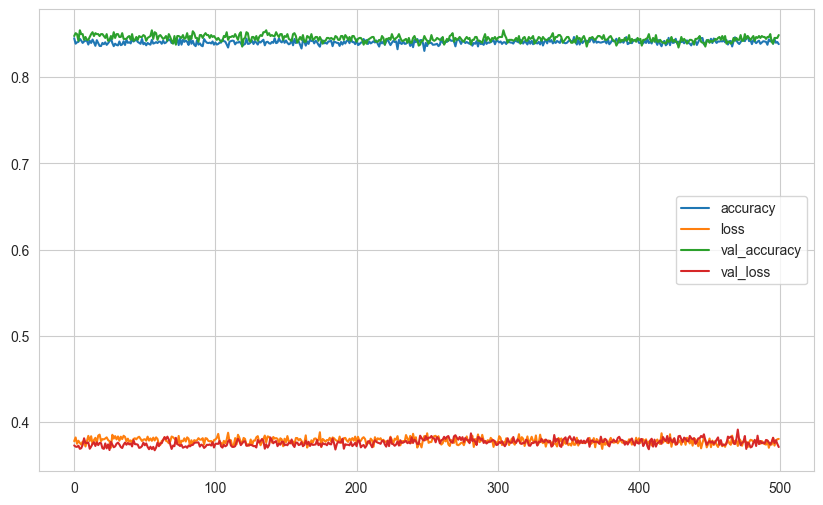

In [81]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [82]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3495063781738281
accuracy:  0.8560000061988831


In [83]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
[[768  28]
 [116  88]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.76      0.43      0.55       204

    accuracy                           0.86      1000
   macro avg       0.81      0.70      0.73      1000
weighted avg       0.85      0.86      0.84      1000



#### Monitor the "val_recall" as metric

In [79]:
early_stop = EarlyStopping(
    monitor="val_recall", mode="min", verbose=1, patience=15, restore_best_weights=True
)

## Optuna

In [63]:
import optuna

In [64]:
def build_model():
    model = Sequential()
    model.add(Input(shape = (X_train.shape[1],))),
    model.add(Dense(64, activation='relu')),
    model.add(Dense(64, activation='relu')),
    model.add(Dense(1, activation='sigmoid'))
    return model

def objective(trial):
    # Suggest hyperparameters for learning rate and class weights
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
    class_weight_0 = trial.suggest_float('class_weight_0', 0.1, 1.0)
    class_weight_1 = trial.suggest_float('class_weight_1', 0.1, 1.0)

    class_weight = {0: class_weight_0, 1: class_weight_1}

    # Build and compile the model
    model = build_model()
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train,
              epochs=10,
              batch_size=32,
              class_weight=class_weight,
              verbose=0,
              validation_data=(X_val, y_val))

    # Evaluate the model
    val_preds = (model.predict(X_val) > 0.5).astype(int)
    val_accuracy = accuracy_score(y_val, val_preds)

    return val_accuracy  # Optuna will maximize this

# Run the study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Print the best hyperparameters
print("Best hyperparameters:", study.best_params)

[I 2025-02-25 21:29:58,005] A new study created in memory with name: no-name-0445e265-acb3-40f9-9615-69b5ea066694


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step


[I 2025-02-25 21:29:59,481] Trial 0 finished with value: 0.8133333333333334 and parameters: {'learning_rate': 0.0024987082878907903, 'class_weight_0': 0.6157098913989244, 'class_weight_1': 0.14456426347441156}. Best is trial 0 with value: 0.8133333333333334.


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step


[I 2025-02-25 21:30:01,001] Trial 1 finished with value: 0.8255555555555556 and parameters: {'learning_rate': 0.0005702130814816346, 'class_weight_0': 0.34774333829758136, 'class_weight_1': 0.23335875793109714}. Best is trial 1 with value: 0.8255555555555556.


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step


[I 2025-02-25 21:30:02,434] Trial 2 finished with value: 0.8188888888888889 and parameters: {'learning_rate': 0.009066298462160702, 'class_weight_0': 0.6422825756373135, 'class_weight_1': 0.10140830949186168}. Best is trial 1 with value: 0.8255555555555556.


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step


[I 2025-02-25 21:30:03,986] Trial 3 finished with value: 0.8077777777777778 and parameters: {'learning_rate': 0.00020125798832674774, 'class_weight_0': 0.39726651431869764, 'class_weight_1': 0.8782370506735285}. Best is trial 1 with value: 0.8255555555555556.


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


[I 2025-02-25 21:30:05,643] Trial 4 finished with value: 0.8311111111111111 and parameters: {'learning_rate': 0.005282450796556994, 'class_weight_0': 0.4129529814130562, 'class_weight_1': 0.9636300584186752}. Best is trial 4 with value: 0.8311111111111111.


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step


[I 2025-02-25 21:30:07,152] Trial 5 finished with value: 0.8211111111111111 and parameters: {'learning_rate': 0.001963652641865899, 'class_weight_0': 0.2926537293862707, 'class_weight_1': 0.9044525275447499}. Best is trial 4 with value: 0.8311111111111111.


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step


[I 2025-02-25 21:30:08,623] Trial 6 finished with value: 0.82 and parameters: {'learning_rate': 0.0006490144735567924, 'class_weight_0': 0.37979176546673765, 'class_weight_1': 0.17813826652507403}. Best is trial 4 with value: 0.8311111111111111.


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


[I 2025-02-25 21:30:10,068] Trial 7 finished with value: 0.8266666666666667 and parameters: {'learning_rate': 0.001832976170740457, 'class_weight_0': 0.2712652668130073, 'class_weight_1': 0.614637345491319}. Best is trial 4 with value: 0.8311111111111111.


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step


[I 2025-02-25 21:30:11,553] Trial 8 finished with value: 0.8377777777777777 and parameters: {'learning_rate': 0.0009625021891737864, 'class_weight_0': 0.5869005764147283, 'class_weight_1': 0.5594140689328392}. Best is trial 8 with value: 0.8377777777777777.


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step


[I 2025-02-25 21:30:12,971] Trial 9 finished with value: 0.8433333333333334 and parameters: {'learning_rate': 0.0017233319849896068, 'class_weight_0': 0.20629059440918937, 'class_weight_1': 0.16665878754750804}. Best is trial 9 with value: 0.8433333333333334.


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step


[I 2025-02-25 21:30:14,425] Trial 10 finished with value: 0.7955555555555556 and parameters: {'learning_rate': 0.00012270455653767143, 'class_weight_0': 0.8952409886224453, 'class_weight_1': 0.3540495443164611}. Best is trial 9 with value: 0.8433333333333334.


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step


[I 2025-02-25 21:30:15,843] Trial 11 finished with value: 0.7988888888888889 and parameters: {'learning_rate': 0.000923679265448468, 'class_weight_0': 0.13397858395941176, 'class_weight_1': 0.5696604226499032}. Best is trial 9 with value: 0.8433333333333334.


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step


[I 2025-02-25 21:30:17,401] Trial 12 finished with value: 0.8 and parameters: {'learning_rate': 0.00032300056690082093, 'class_weight_0': 0.7974381870638864, 'class_weight_1': 0.4402260770145484}. Best is trial 9 with value: 0.8433333333333334.


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step


[I 2025-02-25 21:30:18,856] Trial 13 finished with value: 0.8411111111111111 and parameters: {'learning_rate': 0.0036045607750362267, 'class_weight_0': 0.54254500669221, 'class_weight_1': 0.6627542428232425}. Best is trial 9 with value: 0.8433333333333334.


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step


[I 2025-02-25 21:30:20,296] Trial 14 finished with value: 0.7744444444444445 and parameters: {'learning_rate': 0.003874725673470154, 'class_weight_0': 0.1093032723000124, 'class_weight_1': 0.6988053235511681}. Best is trial 9 with value: 0.8433333333333334.


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step


[I 2025-02-25 21:30:21,722] Trial 15 finished with value: 0.8411111111111111 and parameters: {'learning_rate': 0.004224873214679172, 'class_weight_0': 0.7293595363621552, 'class_weight_1': 0.770820235674376}. Best is trial 9 with value: 0.8433333333333334.


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step


[I 2025-02-25 21:30:23,163] Trial 16 finished with value: 0.8344444444444444 and parameters: {'learning_rate': 0.009362531876574152, 'class_weight_0': 0.9922279353881829, 'class_weight_1': 0.3973419062344399}. Best is trial 9 with value: 0.8433333333333334.


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step


[I 2025-02-25 21:30:24,578] Trial 17 finished with value: 0.8311111111111111 and parameters: {'learning_rate': 0.0015463593065817962, 'class_weight_0': 0.49754542383360945, 'class_weight_1': 0.2758262263175574}. Best is trial 9 with value: 0.8433333333333334.


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step


[I 2025-02-25 21:30:26,017] Trial 18 finished with value: 0.8355555555555556 and parameters: {'learning_rate': 0.003127600593643711, 'class_weight_0': 0.2365715066541811, 'class_weight_1': 0.4834414585531049}. Best is trial 9 with value: 0.8433333333333334.


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step


[I 2025-02-25 21:30:27,443] Trial 19 finished with value: 0.8433333333333334 and parameters: {'learning_rate': 0.006080427135996636, 'class_weight_0': 0.4984106231661829, 'class_weight_1': 0.7106005110731954}. Best is trial 9 with value: 0.8433333333333334.


Best hyperparameters: {'learning_rate': 0.0017233319849896068, 'class_weight_0': 0.20629059440918937, 'class_weight_1': 0.16665878754750804}


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [65]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve

In [66]:
history = model.history.history

In [67]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step
[[763  33]
 [122  82]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       796
           1       0.71      0.40      0.51       204

    accuracy                           0.84      1000
   macro avg       0.79      0.68      0.71      1000
weighted avg       0.83      0.84      0.83      1000



32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step


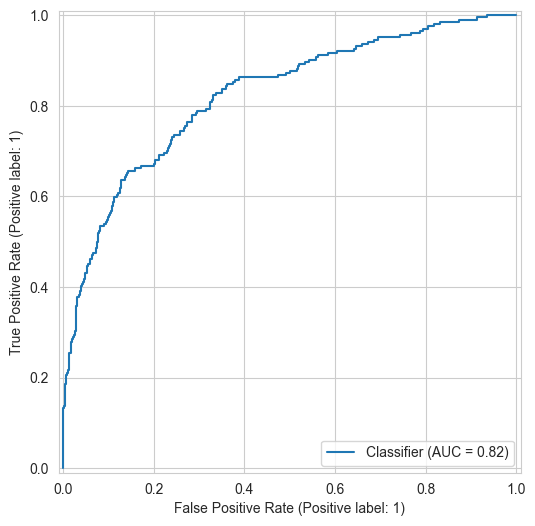

In [68]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [69]:
roc_auc_score(y_test, y_pred_proba)

np.float64(0.8233569809833481)

# Final Model and Model Deployment

## Prediction

In [ ]:
def predict(model=final_model, X_test=X_test, optimal_threshold = 0.224462):

    predict_proba = model.predict_proba(X_test)

    prediction = [1 if i >= optimal_threshold else 0 for i in predict_proba[:,1]]

    return prediction

In [ ]:
y_pred = predict(X_test=sample_2)
y_pred

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___